<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/Quest06(Team_PJ)/Person_set_profile_upgraded_ver_231120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ‚öôÔ∏è Í∏∞Î≥∏ ÏÖãÌåÖ

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
|!pip install python-dotenv
!pip install openai

In [181]:
from dotenv import load_dotenv
import os
# .env ÌååÏùº Î°úÎìú
load_dotenv('/content/drive/MyDrive/AIFFEL_QUESTs/gabe.env')

# ÌôòÍ≤Ω Î≥ÄÏàò ÏÇ¨Ïö©
api_key = os.getenv('OPENAI_API_KEY')

# ÌÅ¥ÎûòÏä§ ÏûëÏÑ± Î∞è Ïã§Ìñâ

## ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ ÏûÖÎ†• ÌÅ¥ÎûòÏä§ : Profile

---

In [186]:
# ÌîÑÏÇ¨ Ïù¥ÎØ∏ÏßÄ Î∞è ÌååÏùºÍ¥ÄÎ¶¨ Í¥ÄÎ†®
from PIL import Image as PILImage
import sys
import requests
import random
import os
from ipywidgets import FileUpload
from IPython.display import display, clear_output, Image

# ÏûÖÎ†•Î∞õÏùÄ Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨ Î∞è Í≤∞Í≥º Ï∂úÎ†• Í¥ÄÎ†®
import pandas as pd
import re


class Profile:
    # ÏÉùÏÑ±Ïûê
    def __init__(self):  # Ï∂îÍ∞ÄÎ°ú Îì§Ïñ¥Í∞à ÏòàÏ†ï(name, age...)
        # Ï¥àÍ∏∞ ÏÜçÏÑ± ÏÑ§Ï†ï
        self.name = None  # Ïù¥Î¶Ñ
        self.age = None   # ÎÇòÏù¥
        self.mbti = None  # MBTI
        self.profile_image = None  # ÌîÑÎ°úÌïÑ Ïù¥ÎØ∏ÏßÄ
        # ÌîÑÏÇ¨ ÎØ∏ÏûÖÎ†•Ïãú ÏÇ¨Ïö©Ìï† ÏÇ¨
        self.default_images = [
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile1.jpg",
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile2.jpg",
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile3.jpg"
        ]
        self.recent_interest = None  # ÏµúÍ∑º Í¥ÄÏã¨ÏÇ¨
        self.career_interest = None  # Ìù¨Îßù ÏßÑÎ°ú
        self.field_of_interest = None  # Í¥ÄÏã¨ Î∂ÑÏïº
        self.hobbies = None  # Ï∑®ÎØ∏
        self.gender = None  # ÏÑ±Î≥Ñ
        self.residence = None # ÏßÄÏó≠
        self.marriage = None # ÌòºÏù∏
        self.guild = None # Í∏∏Îìú
        self.nickname = None # Î≥ÑÎ™Ö
        self.favorite_movies = None  # Ï¢ãÏïÑÌïòÎäî ÏòÅÌôî Î™©Î°ù
        self.favorite_facilitator = 'Ï†ïÏùÄ ÌçºÏã§ÎãòüòÄ'

    # ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥(ÏÉÅÏúÑ Î©îÏÑúÎìú)
    def set_profile(self):
        print("ÏïàÎÖïÌïòÏÑ∏Ïöî~! ÌîÑÎ°úÌïÑ ÏÑ§Ï†ïÏùÑ ÏãúÏûëÌïòÍ∏∞ Ï†ÑÏóê, Îî∞ÎúªÌïú Ïù∏ÏÇ¨Î•º Ï†ÑÌï©ÎãàÎã§! üåº", "\n")
        print("Îã§ÏÜå ÏûÖÎ†•Ïù¥ ÎßéÏïÑ Í∑ÄÏ∞ÆÏúºÏã§ Ïàò ÏûàÏßÄÎßå Î©ãÏßÑ Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌï¥ÎìúÎ¶¥Í≤åÏöî!","\n")

        self.profile_img()  # ÌîÑÏÇ¨ ÏÇ¨ÏßÑ
        self.set_mbti()  # mbti
        self.set_others() # ÎÇòÎ®∏ÏßÄ ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ ÏùºÍ¥Ñ ÏûÖÎ†• Î∞õÍ∏∞
        self.set_interests()

        """
    set_profileÏùò ÌïòÏúÑ Î©îÏÑúÎìúÎì§
    1. profile_img
    2. set_mbti
    3. set_others
        3-1. hobby ÏûÖÎ†•
        3-2. residence
        3-3. marriage
        3-4. guild
        3-5. gender
        3-6. age
        3-7. nickname
        3-8. favorite_facilitator
        3-9. favorite_movies
        3-10. set_interest
            3-10-1. recent_interests_info
            3-10-2. career_interests_info
            3-10-3. field_interests_info
            3-10-4. _get_interest_input : set_interest ÌïòÏúÑ Î©îÏÑúÎìú
    """

    """
    1. ÌîÑÎ°úÌïÑ Ïù¥ÎØ∏ÏßÄ
    """

    # ÌååÏùºÏù¥ÎØ∏ÏßÄ ÏùºÍ¥ÑÏ≤òÎ¶¨ ÏúÑÌïú Î©îÏÑúÎìú Ï∂îÍ∞Ä
    def resize_and_save_image(self, image_path, output_size=(300, 300)):
        try:
            img = PILImage.open(image_path)
            img = img.resize(output_size, PILImage.ANTIALIAS)

            base_name, ext = os.path.splitext(image_path)
            resized_image_path = f"{base_name}_resized{ext}"

            img.save(resized_image_path)
            return resized_image_path
        except IOError:
            print("Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Ï≤òÎ¶¨ÌïòÎäî Îç∞ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.")
            return None

    # urlÏù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
    def download_image(self, url):
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            file_name = url.split("/")[-1] + ".jpg"
            with open(file_name, 'wb') as f:
                f.write(response.content)
            return file_name
        else:
            print("Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ïã§Ìå®")
            return None

    # Í∏∞Î≥∏ Ïù¥ÎØ∏ÏßÄÎ°ú ÏÑ§Ï†ïÌïòÍ∏∞
    def set_default_image(self):
        # Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóê Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
        self.profile_image = random.choice(self.default_images)


    def profile_img(self):
        if self.profile_image is not None:
            return

        print("ÎãπÏã†Ïùò ÌîÑÏÇ¨Î•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî! Íº≠ ÌîÑÏÇ¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ Ï¢ãÏïÑÏöî!üòÄ")

        # Google Colab ÌôòÍ≤Ω Ï≤¥ÌÅ¨ Î∞è ÌååÏùº ÏóÖÎ°úÎìú
        if 'google.colab' in sys.modules:
            from google.colab import files
            uploaded = files.upload()

            if not uploaded:  # ÏóÖÎ°úÎìú Ï∑®ÏÜå Ïãú Í∏∞Î≥∏ Ïù¥ÎØ∏ÏßÄ ÏÑ§Ï†ï
                self.set_default_image()
            else:
                filename = next(iter(uploaded))
                self.profile_image = filename
                resized_image_path = self.resize_and_save_image(filename)
                print(f"Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {resized_image_path}")

        # Jupyter Notebook ÌôòÍ≤ΩÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú
        else:
            try:
                from ipywidgets import FileUpload
                from IPython.display import display, clear_output
                uploader = FileUpload(accept='.jpg,.png', multiple=False)
                display(uploader)

                def on_upload_change(change):
                    if not uploader.value:  # ÏóÖÎ°úÎìú Ï∑®ÏÜå Ïãú Í∏∞Î≥∏ Ïù¥ÎØ∏ÏßÄ ÏÑ§Ï†ï
                        self.set_default_image()
                        clear_output(wait=True)
                        return

                    uploaded_file = next(iter(uploader.value.values()))
                    file_name = uploaded_file['metadata']['name']
                    with open(file_name, 'wb') as f:
                        f.write(uploaded_file['content'])
                    self.profile_image = file_name

                    resized_image_path = self.resize_and_save_image(file_name)
                    print(f"Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {resized_image_path}")
                    clear_output(wait=True)

                uploader.observe(on_upload_change, names='value')
            except ImportError:
                print("Ïù¥ ÌôòÍ≤ΩÏóêÏÑúÎäî ÌååÏùº ÏóÖÎ°úÎìú Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

    """
    2. MBTI ÌîÑÎ°úÌïÑ ÏûÖÎ†• Î∞õÎäî Í≥≥
    """

    def set_mbti(self):
      # ÏûÖÎ†•ÏòàÏãúÎ°ú ÏÇ¨Ïö©Ìï† Ï†ïÎ≥¥
      mbti_list = ['1. INTJ', '2. INTP', '3. ENTJ', '4. ENTP', '5. INFJ', '6. INFP',
                  '7. ENFJ', '8. ENFP', '9. ISTJ', '10. ISFJ', '11. ESTJ', '12. ESFJ', '13. ISTP', '14. ISFP', '15. ESTP', '16. ESFP']

      # Ï†ïÎ≥¥ Ï∂úÎ†•
      mbti_dict = {str(i+1): mbti.split('. ')[1] for i, mbti in enumerate(mbti_list)}
      output = [", ".join(mbti_list[i:i+4]) for i in range(0, len(mbti_list), 4)]
      output_string = "\n".join(output)

      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      # Ï†ïÎ≥¥ ÏûÖÎ†• Î∞õÍ∏∞
      while True:
          print(output_string)
          p_mbti = input('\nÎãπÏã†Ïùò MBTIÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?! ÏúÑ Î¶¨Ïä§Ìä∏Î•º Î≥¥Í≥† Î≤àÌò∏ ÎòêÎäî Î¨∏ÏûêÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî‚å®Ô∏è :  \n')

          if re.search("[Í∞Ä-Ìû£]", p_mbti):
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('MBTIÎäî ÏòÅÏñ¥Î°úÎßå ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî~! Îã§Ïãú ÏûÖÎ†• Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.')
              continue

          if p_mbti in mbti_dict:
              p_mbti = mbti_dict[p_mbti]
          else:
              p_mbti = p_mbti.upper()
              if p_mbti not in [mbti.split('. ')[1] for mbti in mbti_list]:
                  print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                  print("Ïú†ÌòïÏóê ÏóÜÎäî MBTIÎÑ§Ïöî. Îã§Ïãú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî :D")
                  continue

          self.mbti = p_mbti  # ÌÅ¥ÎûòÏä§Ïùò mbti ÏÜçÏÑ± ÏóÖÎç∞Ïù¥Ìä∏
          print(f'ÎãπÏã†Ïùò MBTIÎäî {self.mbti}Íµ∞Ïöî! ÎßåÎÇòÏÑú Î∞òÍ∞ÄÏõåÏöî!')
          print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          break


    """
    3. Í∏∞ÌÉÄ ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ ÏùºÍ¥Ñ ÏûÖÎ†• Î∞õÍ∏∞
    """

    def set_others(self):
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•

      # Ïù¥Î¶Ñ ÏûÖÎ†• Î∞è ÏòàÏô∏ Ï≤òÎ¶¨
      while True:
          self.name = input('\nÎãπÏã†Ïùò Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî~!\n')
          if all('Í∞Ä' <= char <= 'Ìû£' or char.isspace() for char in self.name):
              break
          else:
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('Ïù¥Î¶ÑÏùÄ ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±Îßå Ìè¨Ìï®Ìï† Ïàò ÏûàÏäµÎãàÎã§. Îã§Ïãú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')

      print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•

      """
      3-1. Ï∑®ÎØ∏
      """
      # Ï∑®ÎØ∏ ÏûÖÎ†•
      hobby_list = {1: 'Ïö¥Îèô', 2: 'ÏöîÎ¶¨', 3: 'ÏùåÏïÖ', 4: 'Ïó¨Ìñâ', 5: 'ÎèÖÏÑú', 6: 'Í∏∞ÌÉÄ'}
      hobby = ''
      while hobby == '':
          print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          for k, v in hobby_list.items():
              print(f'{k}. {v}', end='  ')
          print('\n' + '='*100)  # ÏòàÏãú Ï∂úÎ†• ÌõÑ Íµ¨Î∂ÑÏÑ†

          hobby_input = input('\nÎãπÏã†Ïùò Ï∑®ÎØ∏Î•º Ïà´Ïûê ÌòπÏùÄ Î¨∏ÏûêÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!‚å®Ô∏è : \n')
          if hobby_input.isdigit() and int(hobby_input) in hobby_list:
              if int(hobby_input) == 6:
                  etc = ''
                  while etc.isdigit() or etc == '':
                      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                      etc = input('\nÎ¶¨Ïä§Ìä∏Ïóê ÏóÜÎäî Ï∑®ÎØ∏Î•º Í∞ÄÏßÄÍ≥† Í≥ÑÏã†Îã§Î©¥ Í∑∏ Ï∑®ÎØ∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî. : \n')
                      self.hobbies = etc # ÏûÖÎ†•Î∞õÏùÄ Ï†ïÎ≥¥ ÏóÖÎç∞Ïù¥Ìä∏
                      if etc.isdigit() or etc == '':
                          print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                          print('Ï∑®ÎØ∏Îäî Ïà´ÏûêÎÇò Í≥µÎ∞±Ïù¥ Îê† Ïàò ÏóÜÏäµÎãàÎã§.')
                  hobby = etc  # Ïó¨Í∏∞Ïóê hobby Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏
                  self.hobbies = hobby
              else:
                  hobby = hobby_list[int(hobby_input)]  # Ïó¨Í∏∞Ïóê hobby Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏
                  self.hobbies = hobby
          else:
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('Ïò¨Î∞îÎ•∏ Î≤àÌò∏ ÎòêÎäî Ï∑®ÎØ∏Î™ÖÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')
          print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•


      """
      3-2. Í±∞Ï£ºÏßÄ
      """
      region = ''
        # 3-2. Í±∞Ï£ºÏßÄÏó≠ ÏûÖÎ†•
        # ÏûÖÎ†• Î∞õÏùÑ Îïå ÍπåÏßÄ ÏßÑÌñâ

      while region == '':
        region = input('\nÏÇ¨ÏãúÎäî ÏßÄÏó≠(ÎèÑÏãú)Í∞Ä Ïñ¥ÎîîÏã†Í∞ÄÏöî?! üé§ : \n')

        # Í≥µÎ∞±Ïù∏ Í≤ΩÏö∞ Ïò§Î•ò Ï∂úÎ†•
        if region == '':
          print('ÏÇ¨Îäî ÏßÄÏó≠ÏùÄ Í≥µÎ∞±Ïù¥ Îê† Ïàò ÏóÜÏäµÎãàÎã§. Í∑ÄÏ∞ÆÏúºÏãúÎçîÎùºÎèÑ ÏûÖÎ†•ÏùÑ Íº≠Ìï¥Ï£ºÏÑ∏Ïöî!')

        # ÌïúÍ∏Ä or ÌïúÍ∏Ä+Í≥µÎ∞± ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Í≤ΩÏö∞Ïóê ÎåÄÌïú Ï≤òÎ¶¨
        # ÌäπÏàòÎ¨∏Ïûê, Î∞è Í∏∞ÌÉÄÏñ∏Ïñ¥ Ìè¨Ìï®
        # 'Í∞Ä' <= char <= 'Ìûù' : Î¨∏ÏûêÍ∞Ä ÌïúÍ∏Ä Î≤îÏúÑ(ÌïúÍ∏Ä Ïú†ÎãàÏΩîÎìú Í∏∞Ï§Ä)Ïù∏ÏßÄ ÌôïÏù∏
        # char.isspace() : ÏûÖÎ†•Î∞õÏùÄ Î¨∏ÏûêÍ∞Ä Í≥µÎ∞±Ïù∏ÏßÄ ÌôïÏù∏ : Í≥µÎ∞± Ìè¨Ìï®Ìïú ÏûÖÎ†• ÌóàÏö© ex) ÏÑúÏö∏Ïãú Ï¢ÖÎ°úÍµ¨
        # all(..) : list comprehension ÎÇ¥ Î™®Îì† Ï°∞Í±¥ÏùÑ ÎßåÏ°±Ìï¥ TrueÏù∏ÏßÄ ÌåêÎ≥Ñ
        # Í≤∞Î°† : ÌïúÍ∏ÄÎ≤îÏúÑÏóê ÏûàÏßÄ ÏïäÍ±∞ÎÇò, Î¨∏ÏûêÍ∞Ä Í≥µÎ∞±ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† ÏûàÎäî Í≤ΩÏö∞ = ÌïúÍ∏ÄÍ≥º Í≥µÎ∞± Ïô∏Ïùò Î¨∏ÏûêÍ∞Ä Ìè¨Ìï®Îêú Í≤ΩÏö∞

        elif not all('Í∞Ä' <= char <= 'Ìû£' or char.isspace() for char in region):
          print('ÌïúÍ∏ÄÎ°úÎßå ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')

      # ÏûÖÎ†•Î∞õÏùÄ Îç∞Ïù¥ÌÑ∞ ÏµúÏ¢Ö ÏûÖÎ†•
      self.residence = region
      print('-'*100)


      """
      3-3. Í≤∞ÌòºÏó¨Î∂Ä
      """
      # ÌòºÏù∏ Ïó¨Î∂Ä ÏûÖÎ†•
      marry = ''
      while marry not in ['1', '2']:
        print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
        marry = input("\nÍ≤∞Ìòº Ïó¨Î∂ÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî‚å®Ô∏è (1: Í∏∞Ìòº, 2: ÎØ∏Ìòº) : \n")

        # Í∞ÅÍ∞ÅÏùò Í≤ΩÏö∞ Ï≤òÎ¶¨
        if marry == '1':
          self.marriage = 'Í∏∞Ìòº'
        elif marry == '2':
          self.marriage = 'ÎØ∏Ìòº'
        else:
          print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          print('1 ÎòêÎäî 2Î•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')
      print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•


      """
      3-4. Í∏∏ÎìúÎ™Ö
      """
      # Í∏∏Îìú ÏûÖÎ†• (Ïà´ÏûêÎ°ú ÏûÖÎ†•Î∞õÍ∏∞ & ÌçºÏã§Îãò Ïù¥Î¶Ñ Í≤ÄÏ¶ù Ï≤¥Í≥ÑÍ∞úÏÑ†)
      guild_dict = {1: 'Ïùë', 2: 'ÌûåÌäº', 3: 'ÌïòÏÇ¨ÎπÑÏä§'}
      while True:
          print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          try:
              guild_number = int(input('\nÎãπÏã†Ïù¥ ÏÜçÌï¥ÏûàÎäî Í∏∏ÎìúÎ•º Ïà´ÏûêÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî‚å®Ô∏è. (1: Ïùë, 2: ÌûåÌäº, 3: ÌïòÏÇ¨ÎπÑÏä§): \n'))
              if guild_number in guild_dict:
                  self.guild = guild_dict[guild_number]
                  break  # Í∏∏Îìú Î≤àÌò∏Í∞Ä Ïú†Ìö®ÌïòÎ©¥ Î£®ÌîÑÎ•º Ï¢ÖÎ£å
              else:
                  print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                  print('ÏïÑÏù¥Ìé† Ïò®ÎùºÏù∏ 7Í∏∞Ïóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í∏∏ÎìúÏûÖÎãàÎã§.')
          except ValueError:
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('Ïà´ÏûêÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')

      # ÌçºÏã§Îãò Ïù¥Î¶Ñ ÏûÖÎ†• Î∞è ÌôïÏù∏
      # print(f'ÎßûÏïÑÏöî! {self.guild} Í∏∏ÎìúÏùò Îã¥Îãπ ÌçºÏã§ÎãòÏùÄ {facil_input}ÎãòÏù¥ÏóêÏöî:)') ÏóêÏÑú ÏàòÏ†ï -> 'ÏòÅÎπàÎãò?!, 'ÏòÅÎπàÎãòÏù¥Ïöî' Îì±Ïùò ÏûÖÎ†•Ïóê ÎåÄÌïú Ï≤òÎ¶¨Í∞Ä Î≤àÍ±∞Î°úÏõåÏÑú...
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      facil_input = input(f'\nÍ∑∏Î†áÎã§Î©¥ {self.guild} Í∏∏ÎìúÏùò ÌçºÏã§ÎãòÏùò ÏÑ±Ìï®ÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöîüé§ : \n')
      if self.guild == 'Ïùë' and 'Í¥ëÏÑù' in facil_input:
          print(f'ÎßûÏïÑÏöî! {self.guild} Í∏∏ÎìúÏùò Îã¥Îãπ ÌçºÏã§ÎãòÏùÄ Í¥ëÏÑùÎãòÏù¥ÏóêÏöî:)')
      elif self.guild == 'ÌûåÌäº' and 'Ï†ïÏùÄ' in facil_input:
          print(f'ÎßûÏïÑÏöî! {self.guild} Í∏∏ÎìúÏùò Îã¥Îãπ ÌçºÏã§ÎãòÏùÄ Ï†ïÏùÄÎãòÏù¥ÏóêÏöî:)')
      elif self.guild == 'ÌïòÏÇ¨ÎπÑÏä§' and 'ÏòÅÎπà' in facil_input:
          print(f'ÎßûÏïÑÏöî! {self.guild} Í∏∏ÎìúÏùò Îã¥Îãπ ÌçºÏã§ÎãòÏùÄ ÏòÅÎπàÎãòÏù¥ÏóêÏöî:)')
      else:
          print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          print(f'Ïö∞Î¶¨ {self.guild} Í∏∏ÎìúÏóê Í∑∏Îü∞ ÌçºÏã§ÎãòÏùÄ Ïïà Í≥ÑÏÑ∏Ïöî...üòë')
      print('='*100, '\n')  # ÏûÖÎ†• ÏôÑÎ£å Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•


      """
      3-5. ÏÑ±Î≥Ñ
      """
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      # ÏÑ±Î≥Ñ ÏûÖÎ†•
      gd = ''
      while gd == '' or gd.isdigit():
          gd = input('\nÏÑ±Î≥ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöîüé§ : \n')
          if gd == '' or gd.isdigit():
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('ÏÑ±Î≥ÑÏùÄ ÌïÑÏàò ÏûÖÎ†• Í∞íÏù¥Î©∞, Ïà´ÏûêÏùº Ïàò ÏóÜÏäµÎãàÎã§. Îã§Ïãú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')
          elif gd in ['ÎÇ®', 'ÎÇ®Ïûê']:
              self.gender = 'ÎÇ®Ïûê'
              print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              break
          elif gd in ['Ïó¨', 'Ïó¨Ïûê']:
              self.gender = 'Ïó¨Ïûê'
              print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              break
          else:
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('Ïò¨Î∞îÎ•∏ ÏÑ±Î≥ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî. (Ïòà: ÎÇ®Ïûê, Ïó¨Ïûê)')


      """
      3-6. ÎÇòÏù¥
      """
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      # ÎÇòÏù¥ ÏûÖÎ†•
      import datetime
      d = datetime.datetime.now()

      while True:
          try:
              age_input = input('\nÎÇòÏù¥Í∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏÑ∏Ïöî? Îßå ÎÇòÏù¥ ÌòπÏùÄ ÌÉúÏñ¥ÎÇú ÎÖÑÎèÑÎ°ú ÎßêÌï¥Ï£ºÏÑ∏Ïöî.^^ : \n')
              self.age = float(age_input)

              # ÎÇòÏù¥Ïà´ÏûêÎ≥Ñ Ïò§ÏûÖÎ†•Ïóê ÎåÄÌïú Ï≤òÎ¶¨
              if len(age_input) in [1, 2]:
                  print(f'Îßå {int(self.age)}ÏÑ∏Ïù¥ÏãúÍµ∞Ïöî. ÏÉùÏùºÏù¥ ÏßÄÎÇòÏãúÎ©¥ {int(self.age) + 1}ÏÑ∏Í∞Ä ÎêòÏãúÍ≤†ÎÑ§Ïöî~')
                  break

              elif len(age_input) == 4:
                  print(f'{int(self.age)}ÎÖÑÏóê ÌÉúÏñ¥ÎÇòÏÖ®Íµ∞Ïöî. ÎèôÏïàÏù¥ÏãúÎÑ§Ïöî!')
                  self.age = d.year - int(self.age)
                  print(f'Îßå {int(self.age)}ÏÑ∏Ïù¥ÏãúÍµ∞Ïöî. ÏÉùÏùºÏù¥ ÏßÄÎÇòÏãúÎ©¥ {int(self.age) + 1}ÏÑ∏Í∞Ä ÎêòÏãúÍ≤†ÎÑ§Ïöî~')
                  break

              elif len(age_input) >= 5 or self.age <= 0:
                  raise ValueError('Ïò¨Î∞îÎ•¥ÏßÄ ÏïäÏùÄ ÎÇòÏù¥ ÎòêÎäî Ïó∞ÎèÑÏûÖÎãàÎã§.')

              # ÏµúÏ¢Ö selfÏóê Ï†ÑÎã¨Ìï†Îïå
              self.age = str(int(self.age))  # 32.0 -> 32 -> '32'

          except ValueError as e:
              print(e)
              print('ÎÇòÏù¥ÎÇò ÌÉúÏñ¥ÎÇòÏã† Ïó∞ÎèÑÎ•º Ïò¨Î∞îÎ•¥Í≤å ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!')

          except Exception as e:
              print(f'Ïïå Ïàò ÏóÜÎäî Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§. {e}')

      print('='*100, '\n')  # ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•



      """
      3-7. Î≥ÑÎ™Ö
      """
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      # Î≥ÑÎ™Ö ÏûÖÎ†•
      nick = ''
      nick_reason = ''
      nick_dic = {}
      while nick.isdigit() or nick == '':
          nick = input('\nÎãπÏã†Ïùò Î≥ÑÎ™ÖÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî? \n')
          if nick.isdigit() or nick == '':
              print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
              print('Î¨∏ÏûêÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')
          else:
              while nick_reason.isdigit() or nick_reason == '':
                  nick_reason = input(f'\nÎãπÏã†Ïùò Î≥ÑÎ™ÖÏù¥ {nick}Ïù∏ Ïù¥Ïú†ÎèÑ Ïïå Ïàò ÏûàÏùÑÍπåÏöî? \n')
                  if nick_reason.isdigit() or nick_reason == '':
                      print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                      print('Î¨∏ÏûêÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.')
                  else:
                      nick_dic.setdefault(nick, nick_reason)
                      self.nickname = nick_dic
                      print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•

      """
      3-7. Ï¢ãÏïÑÌïòÎäî ÏòÅÌôî
      """
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•

      # MBTI Ïú†ÌòïÎ≥Ñ ÏòÅÌôî Ï†ïÎ≥¥ Ï∂îÏ≤ú ÏúÑÌïú Îç∞Ïù¥ÌÑ∞
      mbti_movie_preferences = {
          "ISTJ": {"ÏÑ∏ÏÉÅÏÜåÍ∏àÌòï", "Ïó≠ÏÇ¨", "ÏÇ¨Í∑π"},
          "ISFJ": {"ÏûÑÍ∏à Îí§ Í∂åÎ†•Ìòï", "ÍµêÏú°", "Î¨∏Ìôî"},
          "INTJ": {"Í≥ºÌïôÏûêÌòï", "ÎØ∏Ïä§ÌÑ∞Î¶¨"},
          "INFJ": {"ÏòàÏñ∏ÏûêÌòï", "ÎìúÎùºÎßà", "Ïó∞ÏÜçÍ∑π"},
          "ISTP": {"Î∞±Í≥ºÏÇ¨Ï†ÑÌòï", "ÏÇ¨ÌöåÌíçÏûêÏ†Å Î©îÏãúÏßÄÍ∞Ä ÏûàÎäî"},
          "ISFP": {"ÏÑ±Ïù∏Íµ∞ÏûêÌòï", "Ïï†ÎãàÎ©îÏù¥ÏÖò", "ÎßåÌôî"},
          "INFP": {"ÏûîÎã§Î•¥ÌÅ¨Ìòï", "ÌåêÌÉÄÏßÄ"},
          "INTP": {"ÏïÑÏù¥ÎîîÏñ¥ Î±ÖÌÅ¨Ìòï", "Í≥ºÌïô"},
          "ESTP": {"ÏàòÏôÑ Ï¢ãÏùÄ ÌôúÎèôÍ∞ÄÌòï", "Ïï°ÏÖò"},
          "ESFP": {"ÏÇ¨ÍµêÏ†Å Ïú†Ìòï", "ÎÆ§ÏßÄÏª¨"},
          "ENFP": {"Ïä§ÌååÌÅ¨Ìòï", "Ïñ¥ÎìúÎ∞¥Ï≤ò"},
          "ENTP": {"Î∞úÎ™ÖÍ∞ÄÌòï", "Î∏îÎûô ÏΩîÎØ∏Îîî"},
          "ESTJ": {"ÏÇ¨ÏóÖÍ∞ÄÌòï", "Î≤ïÏ†ïÎìúÎùºÎßà"},
          "ESFJ": {"ÏπúÎ™©ÎèÑÎ™®Ìòï", "ÌïòÏù¥Ìã¥", "Ïö∞Ï†ï"},
          "ENFJ": {"Ïñ∏Î≥Ä Îä•ÏàôÌòï", "Î°úÎß®Ïä§ ÏΩîÎØ∏Îîî"},
          "ENTJ": {"ÏßÄÎèÑÏûêÌòï", "Ïä§Î¶¥Îü¨", "Í≥µÌè¨"}
      }

      # ÏûÖÎ†•Î∞õÏùÄ MBTI Ïú†ÌòïÏóê Îî∞Î•∏ ÏòÅÌôî Ïû•Î•¥ Ï∂îÏ≤ú Î¨∏Íµ¨ ÏûëÏÑ± Î∞è input Î∞õÍ∏∞
      if self.mbti in mbti_movie_preferences:
          # ÏûÖÎ†•Î∞õÏùÄ mbtiÎ°ú keyÏÑ†ÌÉù
          mbti_info = mbti_movie_preferences[self.mbti]
          mbti_type = mbti_info.pop()  # mbtiÏú†ÌòïÎ≥Ñ ÏÑ§Î™Ö Ï∂îÏ∂ú
          genres = ", ".join(mbti_info)  # Ïû•Î•¥Îì§ Î¨∏ÏûêÏó¥Î°ú Ï†ÑÌôò ÌõÑ ','Î°ú Ïù¥Ïñ¥ Î∂ôÏù¥Í∏∞

          # Ïú†ÌòïÎ≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥ Ï∂úÎ†• Î¨∏Íµ¨ ÏÑ§Ï†ï
          print('='*100, '\n')  # Ïû•Î•¥ Ï∂îÏ≤ú Î¨∏Íµ¨ Ï∂úÎ†• Ï†Ñ Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
          print(f"Î≥¥ÌÜµ {self.mbti}Îäî '{mbti_type} Ïú†ÌòïÏúºÎ°ú {genres} Ïû•Î•¥Î•º Ï¢ãÏïÑÌïúÎã§Í≥† Ìï©ÎãàÎã§.")
          print('='*100, '\n')  # Ïû•Î•¥ Ï∂îÏ≤ú Î¨∏Íµ¨ Ï∂úÎ†• ÌõÑ Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•

          # Ï†ïÎ≥¥ input ÏöîÍµ¨
          favorite_movie_input = input(f"\n{mbti_type} Ïú†ÌòïÏù∏ ÎãπÏã†! ÎãπÏã†Ïùò Ïù∏ÏÉùÏòÅÌôîÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? : \n")
          self.favorite_movies = favorite_movie_input
          print('='*100, '\n')  # ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•


      """
      3-8. Ï¢ãÏïÑÌïòÎäî ÌçºÏã§Îãò
      """
      print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      while True:
          # Ï¢ãÏïÑÌïòÎäî ÌçºÏã§ ÏûÖÎ†• Î∞õÍ∏∞
          facilitator_input = input('\nAIFFELÏóêÏÑú ÎãπÏã†Ïù¥ Í∞ÄÏû• Ï¢ãÏïÑÌïòÎäî ÌçºÏã§ÎãòÏùÄ ÎàÑÍµ∞Í∞ÄÏöî?!(ÎãπÏã†Ïùò ÏÑºÏä§Î•º ÎØøÏäµÎãàÎã§.üòÇ)\n')

          # Ï†ïÏùÄ ÌçºÏã§Îãò ÏïÑÎãêÍ≤ΩÏö∞ ÎìúÎ¶Ω 1Î≤à..
          if 'Ï†ïÏùÄ' not in facilitator_input:
              print("Ï†ïÎßêÏù¥ÏÑ∏Ïöî?! Ï†Ñ Ïó¨Ï†ÑÌûà ÎãπÏã†Ïùò ÏÑºÏä§Î•º ÎØøÏñ¥Ïöî(?!) Îã§Ïãú ÌïúÎ≤àÎßå ÏÉùÍ∞ÅÌï¥ Î≥¥ÏãúÏ£†?! üòí")
              second_chance = input("\nÎã§Ïãú Ìïú Î≤à 'ÏûêÏïå~'ÏÉùÍ∞ÅÌï¥ Î≥ºÍπåÏöî? Ïö∞Î¶¨.. ÏΩîÏñ¥ÏûñÏïÑÏöî...? : \n")

              # ÎëêÎ≤àÏß∏ÎèÑ ÏûÖÎ†•
              # Ï†ïÏùÄ ÌçºÏã§Îãò ÏûÖÎ†•Ìïú Í≤ΩÏö∞ Í∑∏ÎåÄÎ°ú favorite_facilitatorÎ°ú ÏûÖÎ†•
              if 'Ï†ïÏùÄ' in second_chance:
                  #self.favorite_facilitator = second_chance
                  print("Ï†ïÏùÄÎãòÏùÑ Í∞ÄÏû• Ï¢ãÏïÑÌïòÎäîÍµ∞Ïöî! ÏÇ¨ÌöåÏÉùÌôú Ï¢Ä Ìï† Ï§Ñ ÏïÑÏãúÎÑ§Ïöî..?!üòº „Öã„Öã„Öã")
                  break
              # ÏïÑÎãå Í≤ΩÏö∞ÎèÑ Îã§Î•∏ ÏûÖÎ†•Í∞í Í∑∏ÎåÄÎ°ú favorite_facilitatorÎ°ú ÏÑ§Ï†ï
              else:
                  print(f"{self.name}Îãò, Îãò TÏóêÏöî...? ÎààÏπò Ï±ôÍ≤®..üò°")
                  break
          # Ï≤òÏùåÎ∂ÄÌÑ∞ Ï†ïÏùÄ ÌçºÏã§Îãò ÏûÖÎ†•Ìïú Í≤ΩÏö∞ Í∑∏ÎåÄÎ°ú favorite_facilitatorÎ°ú ÏÑ§Ï†ï
          else:
              #self.favorite_facilitator = facilitator_input
              print(f"Ïó≠Ïãú Ï†ïÏùÄ ÌçºÏã§ÎãòÏùÑ Í∞ÄÏû• Ï¢ãÏïÑÌïòÎäîÍµ∞Ïöî! Î©ãÏßÑ ÏÑ†ÌÉùÏûÖÎãàÎã§.üòä")
              break

      print('='*100, '\n')  # ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
      # self.favorite_facilitatorÏóê ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏßÄÏïäÏïÑÏöî. Ïñ¥Ï∞®Ìîº ÎãµÏ†ïÎÑàÍ±∞Îì†Ïöî „Öã„Öã„Öã




    """
    3-10. Í¥ÄÏã¨ÏÇ¨Îì§
    """

    # interest Í¥ÄÎ†® Ìï≠Î™©Îì§ ÏûÖÎ†•Î∞õÏùÑÎïå Ï∂úÎ†•ÎêòÍ≥† Ï†ïÎ≥¥ ÏûÖÎ†•Î∞õÎäî Í≥µÌÜµ Î©îÏÑúÎìú
    def set_interests(self):
        """
        Í¥ÄÏã¨ÏÇ¨ ÏûÖÎ†• Ï≤òÎ¶¨
        """
        print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
        recent_interests_info = ['\n'
            '1. Îç∞Ïù¥ÌÑ∞ Í≥ºÌïô', '2. Ïù∏Í≥µÏßÄÎä•', '3. ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ', '4. ÏÇ¨Ïù¥Î≤Ñ Î≥¥Ïïà', '5. Í∏∞ÌÉÄ' '\n']
        career_interests_info = ['\n'
            '1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞Ä', '2. Î®∏Ïã†Îü¨Îãù ÏóîÏßÄÎãàÏñ¥', '3. Îç∞Ïù¥ÌÑ∞ ÏóîÏßÄÎãàÏñ¥', '4. AI Ïó∞Íµ¨Ïõê', '5. Ï∞ΩÏóÖ''\n']
        field_interests_info = ['\n'
            '1. Î®∏Ïã†Îü¨Îãù', '2. Îî•Îü¨Îãù', '3. Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ', '4. ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨', '5. Î°úÎ¥áÍ≥µÌïô''\n']

        # ÏµúÍ∑º Í¥ÄÏã¨ÏÇ¨ ÏûÖÎ†•
        self.recent_interest = self._get_interest_input(recent_interests_info, "\nÏµúÍ∑º Í¥ÄÏã¨ÏÇ¨Î•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî~! ‚å®Ô∏è: \n")

        # Í¥ÄÏã¨ ÏßÑÎ°ú ÏûÖÎ†•
        self.career_interest = self._get_interest_input(career_interests_info, "\nÍ¥ÄÏã¨ ÏßÑÎ°úÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî~! ‚å®Ô∏è: \n")

        # Í¥ÄÏã¨ Î∂ÑÏïº ÏûÖÎ†•
        self.field_of_interest = self._get_interest_input(field_interests_info, "\nAI Í¥ÄÎ†® Í¥ÄÏã¨ Î∂ÑÏïºÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî~! ‚å®Ô∏è: \n")

    """
    3-10-4. _get_interest_input
    """
    def _get_interest_input(self, interests_info, prompt):
        """
        Í¥ÄÏã¨ÏÇ¨ ÏÑ†ÌÉùÏùÑ ÏúÑÌïú Í≥µÌÜµ ÏûÖÎ†• Ï≤òÎ¶¨ Î©îÏÑúÎìú
        """
        while True:
            print('='*100, '\n')  # ÏûÖÎ†• ÏãúÏûëÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
            print("\n".join(interests_info))
            print("0. ÏßÅÏ†ë ÏûÖÎ†•ÌïòÍ∏∞")
            choice = input(f"\n{prompt} (ÎòêÎäî ÏßÅÏ†ë ÏûÖÎ†•ÌïòÍ≥† Ïã∂Îã§Î©¥ 0Î≤àÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî): ")

            if choice == '0':
                custom_interest = input('Í¥ÄÏã¨ÏÇ¨Î•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî: ')
                print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                return custom_interest
            elif choice.isdigit() and 1 <= int(choice) <= len(interests_info):
                print('='*100, '\n')  # Ï†ïÏÉÅ ÏûÖÎ†• ÏôÑÎ£åÎ•º ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                return interests_info[int(choice) - 1].split('. ')[1]
            else:
                print('+'*100, '\n')  # ÏûòÎ™ªÎêú ÏûÖÎ†•ÏùÑ ÏïåÎ¶¨Îäî Íµ¨Î∂ÑÏÑ† Ï∂úÎ†•
                print('Ïò¨Î∞îÎ•∏ Î≤àÌò∏Î•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî.')

    """
    3-11. ÏûÖÎ†•Î∞õÏùÄ ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ Ï∂úÎ†•
    """
    # ÌîÑÎ°úÌïÑ Ï∂úÎ†• by dataframe

    def display_info(self):

        # ÌîÑÎ°úÌïÑ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        if hasattr(self, 'profile_image') and self.profile_image:
            display(PILImage.open(self.profile_image))
        else:
            print("ÌîÑÎ°úÌïÑ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÑ§Ï†ïÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

        # ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥Î•º DataFrameÏúºÎ°ú ÏÉùÏÑ±
        profile_data = {
            'Ìï≠Î™©': ['Ïù¥Î¶Ñ', 'ÎÇòÏù¥', 'ÏÑ±Î≥Ñ', 'Ï∑®ÎØ∏', 'MBTI', 'Ïù∏ÏÉùÏòÅÌôî', 'Ï¢ãÏïÑÌïòÎäî ÌçºÏã§', 'ÏµúÍ∑ºÍ¥ÄÏã¨ÏÇ¨', 'Í¥ÄÏã¨Ïª§Î¶¨Ïñ¥','Í¥ÄÏã¨AIÎ∂ÑÏïº'],
            'Ï†ïÎ≥¥': [getattr(self, 'name', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'age', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'gender', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'hobbies', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'mbti', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'favorite_movies', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    self.favorite_facilitator,
                    getattr(self, 'recent_interest', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'career_interest', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                    getattr(self, 'field_of_interest', 'Ï†ïÎ≥¥ ÏóÜÏùå'),
                   ]
        }
        profile_df = pd.DataFrame(profile_data)

        # ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ Ï∂úÎ†•
        display(profile_df)

## Î£®Ìã¥ Ï†ïÎ≥¥ ÏûÖÎ†• ÌÅ¥ÎûòÏä§ - Routine

In [187]:
import time

class Routine:
    def __init__(self):
        self.routine = {"ÏïÑÏπ®": {}, "Ï†êÏã¨": {}, "Ï†ÄÎÖÅ": {}}

    def daily_routine(self):
        time_of_day_names = ["ÏïÑÏπ®", "Ï†êÏã¨", "Ï†ÄÎÖÅ"]

        print("ÏïÑÏπ®, Ï†êÏã¨, Ï†ÄÎÖÅÏùò ÏùºÍ≥ºÎ•º ÏàúÏÑúÎåÄÎ°ú ÏûÖÎ†•Ìï†Í≤åÏöî!\n")

        for time_of_day_name in time_of_day_names:
            time.sleep(0.5)
            print(f"\n{time_of_day_name} ÏãúÍ∞ÑÏùò Î£®Ìã¥ÏùÑ ÏûÖÎ†•Ìï©ÎãàÎã§.\n")

            categories = {
                1: {"name": "ÏùºÏÉÅ", "description": "ÏùºÏÉÅÏ†ÅÏù∏ ÌôúÎèôÏùÑ Ìè¨Ìï®Ìïú Î£®Ìã¥ - ÏãùÏÇ¨, Ï≤≠ÏÜå, ÏöîÎ¶¨ Îì±"},
                2: {"name": "ÏóÖÎ¨¥", "description": "Í≤ΩÏ†úÌôúÎèô"},
                3: {"name": "ÌïôÏóÖ", "description": "ÌïôÎ¨∏Ï†ÅÏù∏ ÌôúÎèô Î∞è ÏïÑÏù¥Ìé† ÎÖ∏Îìú ÏòàÏäµ/Î≥µÏäµ"},
                4: {
                    "name": "Ï∑®ÎØ∏ÌôúÎèô Î∞è ÏûêÍ∏∞Í≥ÑÎ∞ú",
                    "description": (
                        "\n-Ïö¥Îèô(Îü¨Îãù, ÏöîÍ∞Ä, Ìó¨Ïä§, Îì±ÏÇ∞...)\n"
                        "-Î¨∏ÌôîÌôúÎèô(ÎèÖÏÑú, ÏòÅÌôî, ÏùåÏïÖ, Ïó∞Í∑π Í∞êÏÉÅ, ÎßõÏßëÌà¨Ïñ¥...)\n"
                        "-Ï∞ΩÏûëÌôúÎèô(Í∏ÄÏì∞Í∏∞, ÏòÅÏÉÅÏ†úÏûë(Ïú†ÌäúÎ∏å), ÏöîÎ¶¨, Îú®Í∞úÏßà...)\n"
                        "-Í∏∞ÌÉÄ(Í∞ÄÎìúÎãù...)"
                    ),
                }
            }

            while True:
                time.sleep(1)
                print("\nÏπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú ÏùºÍ≥ºÎ•º ÏûÖÎ†•Ìï† Ïàò ÏûàÏäµÎãàÎã§\n")

                for key, value in categories.items():
                    time.sleep(0.5)
                    print(f"{key}. {value['name']}: {value['description']}")

                time.sleep(1)

                category_choice = int(input("\nÏûëÏÑ±ÌïòÍ≥† Ïã∂ÏùÄ ÏùºÍ≥ºÏóê Ìï¥ÎãπÌïòÎäî Î≤àÌò∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî : \n"))

                if category_choice not in categories:
                    print("Ïò¨Î∞îÎ•∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Î≤àÌò∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.")
                    continue

                category_name = categories[category_choice]["name"]
                details = input("\nÏûëÏÑ±ÌïòÍ≥† Ïã∂ÏùÄ ÎÇ¥Ïö©ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: \n")

                if category_name not in self.routine[time_of_day_name]:
                    self.routine[time_of_day_name][category_name] = [details]
                else:
                    self.routine[time_of_day_name][category_name].append(details)

                add_more = input("\nÍ≥ÑÏÜçÌï¥ÏÑú Î£®Ìã¥ÏùÑ ÏûÖÎ†•ÌïòÏãúÍ≤†ÏäµÎãàÍπå? (1: Í≥ÑÏÜç, 2: Ï§ëÎã®): \n")

                if add_more != '1':
                    break

        print("\nÏùºÍ≥º ÏûÖÎ†•ÏùÑ ÎßàÏπ©ÎãàÎã§!")

    def print_routine(self):
        print("\nÌòÑÏû¨ Î£®Ìã¥ Ï†ïÎ≥¥:")
        for time_of_day_name, details in self.routine.items():
            print(f"\n{time_of_day_name} ÏãúÍ∞ÑÏùò Î£®Ìã¥:")
            for category, activities in details.items():
                print(f"{category}: {', '.join(activities)}")

## ÌîÑÎ°úÌïÑ ÏûÖÎ†• Î∞õÍ≥† ÌïòÎ£® ÏùºÍ≥ºÎ•º Ï∂úÎ†•ÌïòÎäî ÌÅ¥ÎûòÏä§ : Person
### ÎëêÍ∞úÏùò ÌÅ¥ÎûòÏä§(Profile, Routin)Ïùò Í∏∞Îä•Ìôî Ï†ïÎ≥¥Î•º ÏäπÍ≥ÑÎ∞õÏùÄ child class

- ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥ÏôÄ, Î£®Ìã¥ Ï†ïÎ≥¥Î•º ÌïúÎ≤àÏóê ÏûÖÎ†•Î∞õÏïÑ Í∑∏ Í≤∞Í≥ºÎ•º Í∞ÄÍ≥µÌïòÏó¨ Ï∂úÎ†•ÌïòÎäî Î©îÏÑúÎìú Ï∂îÍ∞Ä

In [188]:
import openai
import os

class Person(Profile, Routine):
    def __init__(self):
        Profile.__init__(self)
        Routine.__init__(self)

        self.set_profile()
        self.daily_routine()

    def collect_info(self):
        info_dict = {
            'name': self.name,
            'age': self.age,
            'mbti': self.mbti,
            'profile_image': self.profile_image,
            'recent_interest': self.recent_interest,
            'career_interest': self.career_interest,
            'field_of_interest': self.field_of_interest,
            'hobbies': self.hobbies,
            'gender': self.gender,
            'residence': self.residence,
            'marriage': self.marriage,
            'guild': self.guild,
            'nickname': self.nickname,
            'favorite_movies': self.favorite_movies,
            'routine': self.routine
        }

        # routine Ï†ïÎ≥¥Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        routine_str = ""
        for time_of_day, activities in info_dict['routine'].items():
            activities_str = "; ".join(
                [f"{category}: {', '.join(details)}" for category, details in activities.items()])
            routine_str += f"{time_of_day}: {activities_str}\n"

        info_dict['routine_str'] = routine_str
        return info_dict

    def generate_essay(self, info_dict):
        # OpenAI API ÌÇ§ ÏÑ§Ï†ï
        openai.api_key = os.getenv("OPENAI_API_KEY")

        prompt = f"""
        {info_dict['name']}Ïùò ÌîÑÎ°úÌïÑ:
        ÎÇòÏù¥: {info_dict['age']}, ÏÑ±Î≥Ñ: {info_dict['gender']}, MBTI: {info_dict['mbti']}, Ï∑®ÎØ∏: {info_dict['hobbies']},
        ÏµúÍ∑º Í¥ÄÏã¨ÏÇ¨: {info_dict['recent_interest']}, Í¥ÄÏã¨ ÏßÑÎ°ú: {info_dict['career_interest']},
        Í¥ÄÏã¨ Î∂ÑÏïº: {info_dict['field_of_interest']}, Í±∞Ï£ºÏßÄ: {info_dict['residence']},
        Í≤∞Ìòº Ïó¨Î∂Ä: {info_dict['marriage']}, ÏÜçÌïú Í∏∏Îìú: {info_dict['guild']}, Î≥ÑÎ™Ö: {info_dict['nickname']},
        Ï¢ãÏïÑÌïòÎäî ÏòÅÌôî: {info_dict['favorite_movies']}.

        {info_dict['name']}Ïùò ÌïòÎ£®:
        {info_dict['routine_str']}

        Ïù¥ Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú {info_dict['name']}Ïùò ÌïòÎ£® ÏùºÍ≥ºÏóê ÎåÄÌï¥ ÍπÄÏòÅÌïò ÏûëÍ∞ÄÎãòÏùò Ïä§ÌÉÄÏùºÎ°ú ÏóêÏÑ∏Ïù¥Î•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
        ÏÜåÍ∞úÎ¨∏Íµ¨Îäî ÌïÑÏöî ÏóÜÍ≥†, Ïò§Î°úÏßÄ Î≥∏Î¨∏Îßå Ï†úÍ≥µÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
        """

        response = openai.ChatCompletion.create(
            model="gpt-4",  # Ï†ÅÏ†àÌïú Î™®Îç∏ Ïù¥Î¶Ñ ÏÇ¨Ïö©
            messages=[
                {"role": "system", "content": "You are an assistant who can write a essay like human written"},
                {"role": "user", "content": prompt}
            ]
        )

        # Ï±óÎ¥á API ÏùëÎãµ Íµ¨Ï°∞Ïóê ÎßûÍ≤å ÏóêÏÑ∏Ïù¥ Ï∂îÏ∂ú
        essay = response['choices'][0]['message']['content']
        formatted_output = "\n".join(essay.split(". "))  # ÎßàÏπ®Ìëú Îí§Ïóê Í≥µÎ∞±Í≥º Ìï®Íªò Î¨∏Ïû• Î∂ÑÎ¶¨
        print("="*100)
        return formatted_output

    def print_all_info(self):
        print('=' * 100, '\n')
        choice = input("\n1. Simple Î≤ÑÏ†Ñ, 2. Fancy Î≤ÑÏ†Ñ Ï§ë ÏÑ†ÌÉù: \n")

        if choice == '1':
            self.display_info()
            self.print_routine()
            # Í≤ΩÍ≥ÑÏÑ† Ï∂úÎ†•
            print('=' * 100)
            # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
            display(Image(filename='/content/drive/MyDrive/AIFFEL_QUESTs/ask_for.jpg'))
            # Ï∂îÍ∞Ä ÏßàÎ¨∏ Ï∂úÎ†•
            fancy_choice = input("\nÏö∞Î¶¨Í∞Ä ÎßåÎì† FancyÎ≤ÑÏ†ÑÎèÑ ÏßÑÏßú Í¥úÏ∞ÆÏùÄÎç∞ ÌïúÎ≤àÎßå ÌôïÏù∏Ìï¥Ï£ºÏãúÎ©¥ ÏïàÎê†ÍπåÏöî?!' (1. Î≥ºÍ≤åÏöî. 2. Í¥úÏ∞ÆÏïÑÏöî): \n")
            # ÏÇ¨Ïö©ÏûêÏùò ÏÑ†ÌÉùÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ Fancy Î≤ÑÏ†Ñ Ï∂úÎ†•
            if fancy_choice == '1' :
                info_dict = self.collect_info()
                essay = self.generate_essay(info_dict)
                print(essay)
            elif fancy_choice == '2':
              print('\nÌïúÍ≤å ÏïÑÍπåÏõåÏÑúÎùºÎèÑ Î¥êÏ£ºÏÑ∏Ïöî.. Ï£ºÎßê ÎèôÏïà Ïù¥Í≤ÉÎßå ÌñàÎã® ÎßêÏù¥ÏóêÏöî..Ï¢Ä Îßå Í∏∞Îã§Î†§ Ï§òÏöî....\n')
              print("="*100)
              print("="*100)
              info_dict = self.collect_info()
              essay = self.generate_essay(info_dict)
              print(essay)

        elif choice == '2':
            info_dict = self.collect_info()
            essay = self.generate_essay(info_dict)
            print(essay)
        else:
            print("ÏûòÎ™ªÎêú ÏÑ†ÌÉùÏûÖÎãàÎã§.")

# ÌÖåÏä§Ìä∏

ÏïàÎÖïÌïòÏÑ∏Ïöî~! ÌîÑÎ°úÌïÑ ÏÑ§Ï†ïÏùÑ ÏãúÏûëÌïòÍ∏∞ Ï†ÑÏóê, Îî∞ÎúªÌïú Ïù∏ÏÇ¨Î•º Ï†ÑÌï©ÎãàÎã§! üåº 

Îã§ÏÜå ÏûÖÎ†•Ïù¥ ÎßéÏïÑ Í∑ÄÏ∞ÆÏúºÏã§ Ïàò ÏûàÏßÄÎßå Î©ãÏßÑ Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌï¥ÎìúÎ¶¥Í≤åÏöî! 

ÎãπÏã†Ïùò ÌîÑÏÇ¨Î•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî! Íº≠ ÌîÑÏÇ¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ Ï¢ãÏïÑÏöî!üòÄ


<ipython-input-186-23d57a723efd>:80: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(output_size, PILImage.ANTIALIAS)


Saving gabe_sample.jpg to gabe_sample (2).jpg
Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: gabe_sample (2)_resized.jpg

1. INTJ, 2. INTP, 3. ENTJ, 4. ENTP
5. INFJ, 6. INFP, 7. ENFJ, 8. ENFP
9. ISTJ, 10. ISFJ, 11. ESTJ, 12. ESFJ
13. ISTP, 14. ISFP, 15. ESTP, 16. ESFP

ÎãπÏã†Ïùò MBTIÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?! ÏúÑ Î¶¨Ïä§Ìä∏Î•º Î≥¥Í≥† Î≤àÌò∏ ÎòêÎäî Î¨∏ÏûêÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî‚å®Ô∏è :  
Ïù∏ÌîÑÏ†ú
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

MBTIÎäî ÏòÅÏñ¥Î°úÎßå ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî~! Îã§Ïãú ÏûÖÎ†• Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.
1. INTJ, 2. INTP, 3. ENTJ, 4. ENTP
5. INFJ, 6. INFP, 7. ENFJ, 8. ENFP
9. ISTJ, 10. ISFJ, 11. ESTJ, 12. ESFJ
13. ISTP, 14. ISFP, 15. ESTP, 16. ESFP

ÎãπÏã†Ïùò MBTIÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?! ÏúÑ Î¶¨Ïä§Ìä∏Î•º Î≥¥Í≥† Î≤àÌò∏ ÎòêÎäî Î¨∏ÏûêÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî‚å®Ô∏è :  
5
ÎãπÏã†Ïùò MBTIÎäî INFJÍµ∞Ïöî! ÎßåÎÇòÏÑú Î∞òÍ∞ÄÏõåÏöî!



ÎãπÏã†Ïùò Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî~!
ÏäπÏàú


1. Ïö¥Îèô  2. ÏöîÎ¶¨  3. ÏùåÏïÖ  4. Ïó¨Ìñâ  5. ÎèÖÏÑú  6. Í∏∞ÌÉÄ  

Î

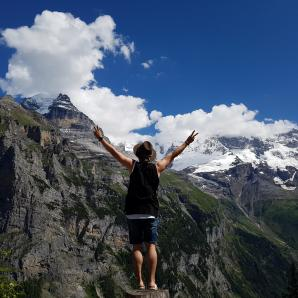

Ìï≠Î™©                                                Ï†ïÎ≥¥
0       Ïù¥Î¶Ñ                                                ÏäπÏàú
1       ÎÇòÏù¥                                                35
2       ÏÑ±Î≥Ñ                                                ÎÇ®Ïûê
3       Ï∑®ÎØ∏  Ï±ÖÏùΩÍ∏∞, ÏöîÎ¶¨ÌïòÍ∏∞, Ïì∏Îç∞ÏóÜÎäîÍ±∞ ÏΩîÎî©Ìï¥ÏÑú ÌîÑÎ°úÍ∑∏Îû®ÎßåÎì§Í∏∞, Í≥†ÏñëÏù¥Îûë ÎÜÄÍ∏∞, Ïó¨ÌñâÍ∞ÄÍ∏∞, ÏÇ∞Ï±Ö
4     MBTI                                              INFJ
5     Ïù∏ÏÉùÏòÅÌôî                                     Î°úÎ≤ÑÌä∏ Îìú ÎãàÎ°úÏùò Ïù∏ÌÑ¥!
6  Ï¢ãÏïÑÌïòÎäî ÌçºÏã§                                           Ï†ïÏùÄ ÌçºÏã§ÎãòüòÄ
7    ÏµúÍ∑ºÍ¥ÄÏã¨ÏÇ¨     Ïñ¥ÎñªÍ≤å ÌïòÎ©¥ ÏÉùÏÇ∞ÏÑ±ÏùÑ ÎÜíÏó¨ÏÑú ÏãúÍ∞ÑÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïì∏ÏàòÏûàÏùÑÍπå? ÏôÄ ÌîºÎìúÎ∞±ÏùÑ ÌÜµÌïú ÏÑ±Ïû•
8    Í¥ÄÏã¨Ïª§Î¶¨Ïñ¥                                           Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞Ä
9   Í¥ÄÏã¨AIÎ∂ÑÏïº                                        LLMÍ≥º Ï∂îÏ≤úÏãúÏä§ÌÖú


ÌòÑÏû¨ Î£®Ìã¥ Ï†ïÎ≥¥:

ÏïÑÏπ® ÏãúÍ∞ÑÏùò Î£®Ìã¥:
ÏùºÏÉÅ: Ïä§Ìä∏Î†àÏπ≠ ÌõÑ Í∞ïÎ≥ÄÏÇ∞Ï±Ö 1ÏãúÍ∞Ñ, ÏßëÏïàÏùºÌïòÍ≥† Í≥†ÏñëÏù¥Îûë ÎÜÄÏïÑÏ£ºÍ∏∞
ÏóÖÎ¨¥: Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ÏïÑÎ•¥Î∞îÏù¥Ìä∏

Ï†êÏã¨ ÏãúÍ∞ÑÏùò Î£®Ìã¥:
ÌïôÏóÖ: Í∑∏Î£®Î∂ÑÎì§Í≥º ÏïÑÏù¥Ìé† ÎÖ∏Îìú ÌïôÏäµ

Ï†ÄÎÖÅ ÏãúÍ∞ÑÏùò Î£®Ìã¥:
ÏùºÏÉÅ: Ï†ÄÎÖÅ ÏãùÏÇ¨ÌõÑ 1ÏãúÍ∞Ñ Ìú¥Ïãù
ÌïôÏóÖ: Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ Î∞è Î∂ÑÏÑù ÏïÑÎ•¥Î∞îÏù¥Ìä∏, Í≥µÎ∂ÄÌïú ÎÇ¥Ïö© Î≥µÏäµÌïòÎ©∞ ÏòµÏãúÎîîÏñ∏Ïóê Ï†ïÎ¶¨
Ï∑®ÎØ∏ÌôúÎèô Î∞è ÏûêÍ∏∞Í≥ÑÎ∞ú: Í≥µÎ∂ÄÌïú ÎÇ¥Ïö© Ï†ïÎ¶¨Ìï¥ÏÑú ÏûëÏÑ±ÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ Î∏îÎ°úÍ∑∏Ïóê ÏóÖÎ°úÎìú


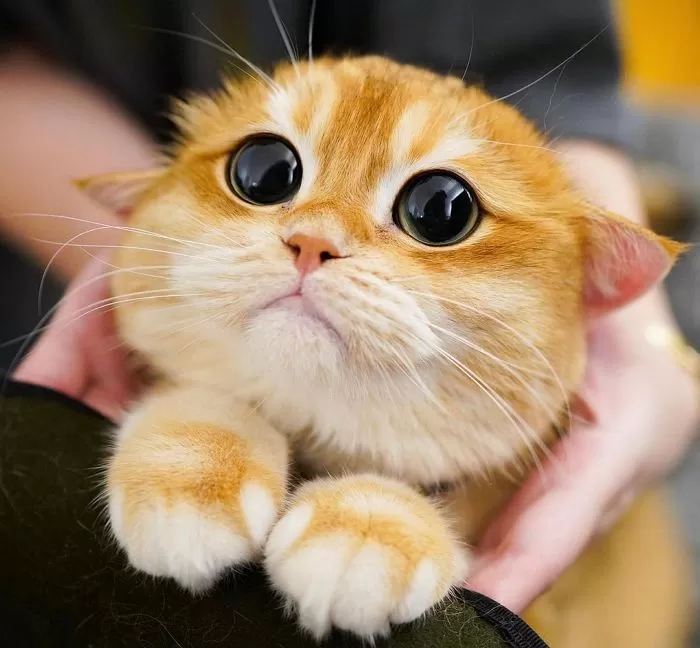


Ïö∞Î¶¨Í∞Ä ÎßåÎì† FancyÎ≤ÑÏ†ÑÎèÑ ÏßÑÏßú Í¥úÏ∞ÆÏùÄÎç∞ ÌïúÎ≤àÎßå ÌôïÏù∏Ìï¥Ï£ºÏãúÎ©¥ ÏïàÎê†ÍπåÏöî?!' (1. Î≥ºÍ≤åÏöî. 2. Í¥úÏ∞ÆÏïÑÏöî): 
2

ÌïúÍ≤å ÏïÑÍπåÏõåÏÑúÎùºÎèÑ Î¥êÏ£ºÏÑ∏Ïöî.. Ï£ºÎßê ÎèôÏïà Ïù¥Í≤ÉÎßå ÌñàÎã® ÎßêÏù¥ÏóêÏöî..Ï¢Ä Îßå Í∏∞Îã§Î†§ Ï§òÏöî....

ÎÇòÎäî Ïù¥Î•∏ ÏïÑÏπ®, ÏäπÏàúÏùò Î∂âÏùÄ ÏñºÍµ¥Ïù¥ Î≤†Í∞úÏóêÏÑú Îπ†Ï†∏ÎÇòÏò§Îäî Í≤ÉÏùÑ Î≥∏Îã§
Í∑∏Ïùò ÎààÏùÄ ÌèâÏÜåÎ≥¥Îã§ ÌïúÏ∏µ Îçî ÍπäÏñ¥Î≥¥ÏòÄÎã§
ÎÇòÎäî Í∑∏Ïùò ÎààÎπõÏóêÏÑú ÌïòÎ£®Î•º ÏãúÏûëÌïòÎäî Í≤∞Ïã¨Í≥º ÏùòÏßÄÎ•º Î≥¥ÏïòÎã§
Í∑∏Îäî ÏïÑÏ£º Ï°∞Í∏àÏùò ÏõÄÏßÅÏûÑÏúºÎ°ú ÏÑúÏÑúÌûà Î™∏ÏùÑ ÏùºÏúºÏºú ÏÑ∏Ïö∞Î©∞ Î≤†ÎûÄÎã§Î•º Ìñ•Ìï¥ Î∞úÍ∏∏ÏùÑ ÎèåÎ¶∞Îã§
Í∑∏Ïùò Ï≤´ Î≤àÏß∏ ÏùºÍ≥ºÎäî Ïä§Ìä∏Î†àÏπ≠Í≥º Í∞ïÎ≥ÄÏÇ∞Ï±ÖÏù¥Îã§


ÏÑ∏ÏÉÅÏùÄ ÏïÑÏßÅ Ïû†Îì§Ïñ¥ ÏûàÎäîÎç∞, Í∑∏Îäî Ïù¥ÎØ∏ Ïó¨ÏùòÎèÑÏùò Í∞ïÎ≥ÄÏóêÏÑú Ïä§Ïä§Î°úÎ•º Î∂ÑÎ∞úÌïòÍ≥† ÏûàÎã§
Í∑∏Îäî Î™∏ÏùÑ Îí§ÌãÄÎ©∞, Í∞ïÎ¨ºÏùò ÌùêÎ¶ÑÏóê ÎßûÏ∂∞ Í±∑ÎäîÎã§
Í∑∏Ïùò Î™®ÏäµÏùÄ Ïñ¥ÎîòÍ∞Ä Ïì∏Ïì∏ÌïòÎ©¥ÏÑúÎèÑ Ïö©Í∞êÌïòÍ≤å Î≥¥ÏòÄÎã§
Í∑∏ Îã§ÏùåÏùÄ ÏßëÏïà ÏùºÍ≥º Í≥†ÏñëÏù¥ÏôÄ ÎÜÄÏù¥, Í∑∏Î¶¨Í≥† Í∑∏Ïùò Ìïú Ï§ÑÍ∏∞ Îπõ, Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ 

In [189]:
# ÏÇ¨Ïö© ÏòàÏãú
info = Person() # ÌÅ¥ÎûòÏä§ Í∞ùÏ≤¥ ÏÉùÏÑ± Î∞è Ï†ïÎ≥¥ ÏûÖÎ†•Î∞õÍ∏∞
info.print_all_info() # Ï†ïÎ≥¥ Ï∂úÎ†•